In [162]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

def fb_score(y_true, y_pred, beta):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return ((1 + beta**2) * precision * recall) / ((beta**2) * precision + recall)

def f1_func(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return (2 * precision * recall) / (precision + recall)

def f2_func(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return (5 * precision * recall) / (4 * precision + recall)

def classification_results(y_true, y_pred, verbose=0):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_func(y_true, y_pred)
    f2 = f2_func(y_true, y_pred)
    if verbose:
        results = [
            ("accuracy", accuracy), 
            ("precision", precision),
            ("recall", recall),
            ("f1", f1),
            ("f2", f2),
        ]
        print("\nCLASSIFICATION METRICS:\n")
        for (metric, score) in results:
            print(f"{metric} = {score:.2f}")
        print("\n")
    return [accuracy, precision, recall, f1, f2]

f1_score = make_scorer(f1_func)
f2_score = make_scorer(f2_func)

base_dir = os.path.join(os.getcwd(), os.pardir)

In [163]:
data_path = os.path.join(base_dir, "data/altered/imputed/maps_xgboost_impute.csv")
df = pd.read_csv(data_path, index_col="X")

In [164]:
target_feature = "has_dep_diag"

dep_features = [
    target_feature, 
    "prim_diag", 
    "secd_diag", 
    "dep_score", 
    "dep_thoughts"
]

all_target_features = [x for x in df.columns if x not in dep_features]

medical_features = [
    "mat_dep","mat_anx_1", "mat_anx_18m", 
    "mat_anx_8m", "agg_score", "emot_cruel", 
    "phys_cruel", "mat_anx_0m", "dep_band_15", 
    "dep_band_13", "dep_band_10", "dep_band_07", 
    "anx_band_15", "anx_band_13", "anx_band_10", 
    "anx_band_07", "secd_diag","prim_diag", 
    "panic_score", "dep_thoughts", "dep_score", 
]

non_medical_features = [
    "comp_bed_9", "mat_age", "weight_16", "height_16", "iq",
    "comp_noint_bed_16", "comp_int_bed_16", "talk_phon_wend", 
    "text_wend", "talk_mob_wend", "comp_wend", "musi_wend", 
    "read_wend", "work_wend", "alon_wend", "draw_wend", 
    "play_wend", "tv_wend", "out_win_wend", "out_sum_wend", 
    "tran_wend", "talk_phon_week", "text_week", "talk_mob_week", 
    "comp_week", "musi_week", "read_week", "work_week", 
    "alon_week", "draw_week", "play_week", "tv_week", 
    "out_win_week", "out_sum_week", "tran_week", "pat_pres_10",
    "pat_pres_8", "pat_pres", "num_home", "pat_ses", "mat_ses", 
    "pat_edu", "mat_edu", "parity", "exercise", "child_bull", 
    "phone_14_wend", "phone_14_week", "musi_13", "tv_bed_9", 
    "own_mob", "comp_house", "tv_bed_16", "creat_14", "comp_games", 
    "fam_tv_eve", "fam_tv_aft", "fam_tv_mor", "sex", "birth_order"
]

screen_time_features = [
    "comp_bed_9", "comp_noint_bed_16", 
    "comp_int_bed_16", "comp_wend", "tv_wend",
    "comp_week", "tv_week", "tv_bed_9", 
    "comp_house", "tv_bed_16", "comp_games", 
    "fam_tv_eve", "fam_tv_aft", "fam_tv_mor",
]

In [165]:
X = df[screen_time_features]
y = df[target_feature]

In [166]:
X

,comp_bed_9,comp_noint_bed_16,comp_int_bed_16,comp_wend,tv_wend,comp_week,tv_week,tv_bed_9,comp_house,tv_bed_16,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor
X,,,,,,,,,,,,,,
1,0.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13730,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
13731,0.0,0.0,1.0,2.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
13732,0.0,0.0,1.0,2.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

minority:majority = 389:13345 (1:34)


<AxesSubplot:xlabel='class', ylabel='count'>

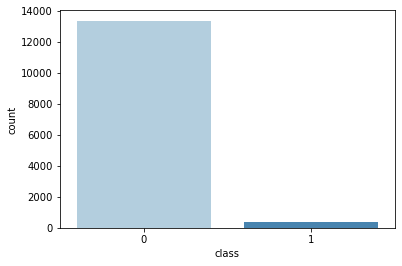

In [168]:
dep_counts = y.value_counts()
dep_list = list(zip([0, 1], dep_counts.tolist()))
sample_ratio = dep_counts[0] / dep_counts[1]
print(f"minority:majority = {dep_counts[1]}:{dep_counts[0]} (1:{sample_ratio:.0f})")

dep_df = pd.DataFrame(dep_list, columns=["class", "count"])
sns.barplot(x="class", y="count", data=dep_df, palette="Blues")

In [170]:
xgb = XGBClassifier(
	objective="binary:logistic",
    eval_metric="logloss",
	scale_pos_weight=sample_ratio,
	n_jobs=1,
)
xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)
results = classification_results(y_test, preds, verbose=1)

/home/kai/anaconda3/envs/ds/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

CLASSIFICATION METRICS:

accuracy = 0.86
precision = 0.05
recall = 0.21
f1 = 0.08
f2 = 0.12




In [171]:
report = classification_report(y_test, preds, output_dict=True)

for r in report:
    print(r, report[r], "\n")

0.0 {'precision': 0.9742096505823628, 'recall': 0.8774822030723117, 'f1-score': 0.9233195347920363, 'support': 2669} 

1.0 {'precision': 0.04664723032069971, 'recall': 0.20512820512820512, 'f1-score': 0.07600950118764845, 'support': 78} 

accuracy 0.8583909719694212 

macro avg {'precision': 0.5104284404515312, 'recall': 0.5413052041002584, 'f1-score': 0.4996645179898424, 'support': 2747} 

weighted avg {'precision': 0.947871875270965, 'recall': 0.8583909719694212, 'f1-score': 0.8992604948862694, 'support': 2747} 



In [172]:
imp_df = pd.DataFrame(zip(X_train.columns, xgb.feature_importances_), columns=["feature", "importance"])
imp_df.sort_values("importance", ascending=False)

,feature,importance
5,comp_week,0.142879
9,tv_bed_16,0.108572
1,comp_noint_bed_16,0.086670
11,fam_tv_eve,0.076672
8,comp_house,0.074293
0,comp_bed_9,0.070857
10,comp_games,0.069114
6,tv_week,0.068840
12,fam_tv_aft,0.068040
13,fam_tv_mor,0.064471


---